# HomeWork 9

**DeadLine : 23:59 5 Azar 1399**

**Total points : 100 pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 2

Here is for your helper functions (optional).

Implement this function for Augmented reality.

In [3]:
def AR(background, image):
    '''
    Adds the input image to the background image properly.
    
    Parameters:
        background (numpy.ndarray) : background image
        image (numpy.ndarray): input image
    
    Returns:
        numpy.ndarray: The result image.
    '''
    result = background.copy()
    
    src_points = np.float32([
        [0, 0],
        [0, 1799],
        [1199, 1799],
        [1199, 0]
    ])
    dst_points = np.float32([
        [148, 105],
        [143, 225],
        [236, 228],
        [237, 105]
    ])
    
    h, status = cv2.findHomography(src_points, dst_points)

    image_perspective = cv2.warpPerspective(image, h, (background.shape[1], background.shape[0]))

    for i in range(background.shape[0]):
        for j in range(background.shape[1]):
            if image_perspective[i, j].all() > 0:
                result[i, j] = image_perspective[i, j]    
    
    return result

Test your implementation (dont change this cell)

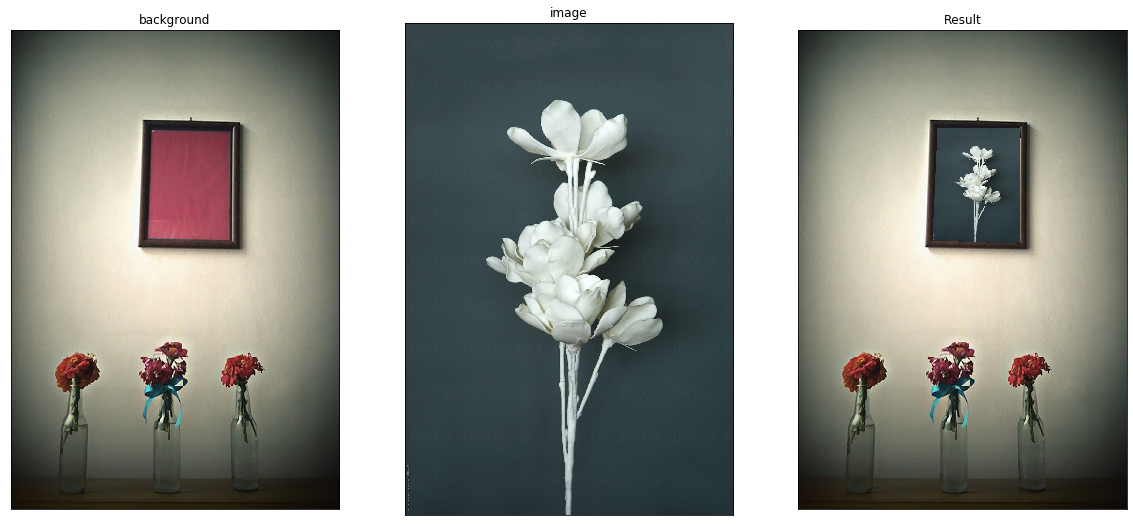

In [4]:
image_list = []

background = cv2.imread(os.path.join('images', 'background.jpg'))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
image_list.append([background, 'background', 'img'])

image = cv2.imread(os.path.join('images', '1.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_list.append([image, 'image', 'img'])

image_list.append([AR(background, image), 'Result', 'img'])


plotter(image_list,1 , 3, True, 20, 10, '2')

# PART 3A

Here is for your helper functions (optional).

In [5]:
 def compute_histogram(image):
        
    histogram = np.zeros((256), np.int)
    np.add.at(histogram, image, 1)
    return histogram

Implement this function to get the global otsu algorithm output.

In [6]:
def global_otsu(image):
    '''
    Applys global otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    sigma_optim = 100000000
    threshold = 0
    
    histogram = compute_histogram(image)
    
    total_count = np.sum(histogram)

    for t in range(1, 255):
        P1 = histogram[:t]
        P2 = histogram[t:]
        
        Q1 = np.sum(P1)
        Q2 = np.sum(P2)
        
        W1 = Q1 / total_count
        W2 = Q2 / total_count
                
        V1 = np.var(image[image < t])
        V2 = np.var(image[image >= t])
        
        Sigma = W1 * V1 + W2 * V2
        
        if Sigma < sigma_optim:
            sigma_optim = Sigma
            threshold = t
    
    image = np.where(image < threshold, 0, 255)
    
    return image

Test your implementation (dont change this cell)

/Users/pooya/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/pooya/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pooya/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


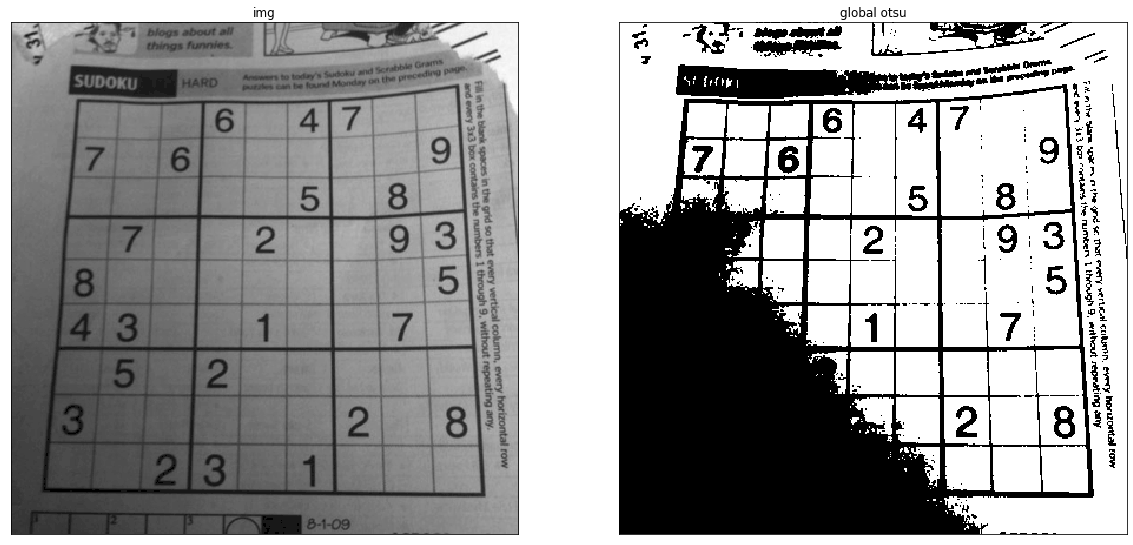

In [7]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])



image_list.append([global_otsu(image), 'global otsu', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3A')

# PART 3B

Here is for your helper functions (optional).

Implement this function to get local otsu algorithm output.

In [8]:
def local_otsu(image):
    '''
    Applys local otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    result = np.zeros_like(image)
    rows, cols = image.shape
    
    x_mid = rows // 2
    y_mid = cols // 2

    result[:x_mid, :y_mid] = global_otsu(image[:x_mid, :y_mid])
    result[:x_mid, y_mid:] = global_otsu(image[:x_mid, y_mid:])
    result[x_mid:, :y_mid] = global_otsu(image[x_mid:, :y_mid])
    result[x_mid:, y_mid:] = global_otsu(image[x_mid:, y_mid:])
    
    return result

Test your implementation (dont change this cell)

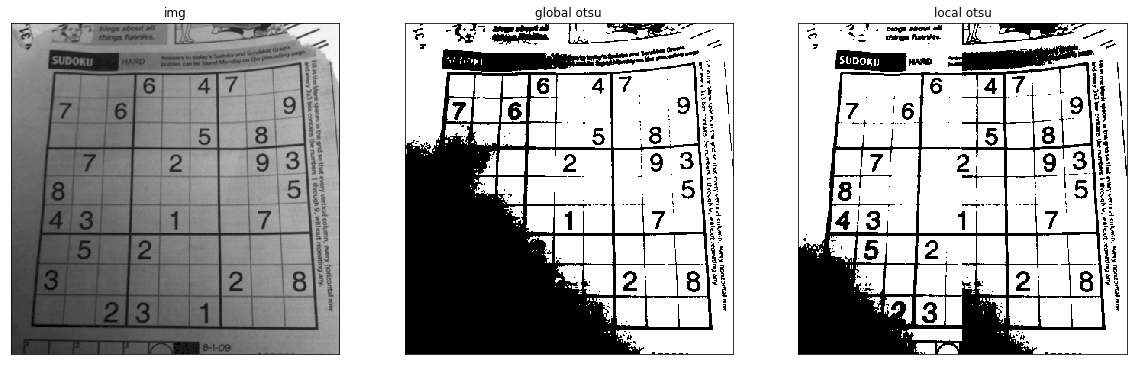

In [9]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])

plotter(image_list, 1, 3, True, 20, 10, '3B')

# PART 3C

Here is for your helper functions (optional).

Implement this function to get the adaptive threshold algorithm output.

In [10]:
def adaptive_th(image):
    '''
    Applys adaptive threshold on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    result = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 8)
    
    
    return result

Test your implementation (dont change this cell)

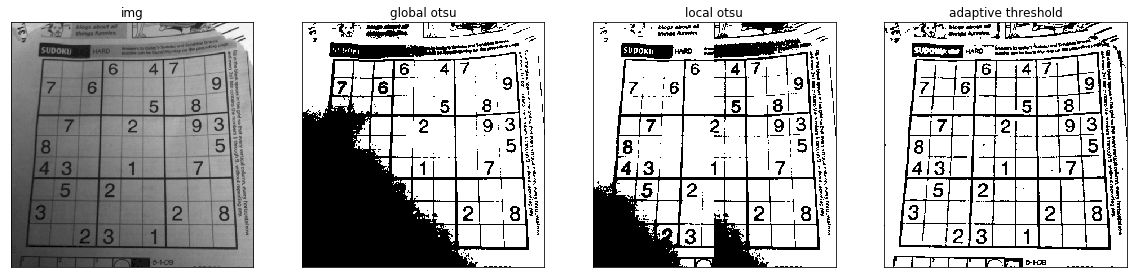

In [11]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])
image_list.append([adaptive_th(image), 'adaptive threshold', 'img'])

plotter(image_list, 1, 4, True, 20, 10, '3C')

# PART 4

Here is for your helper functions (optional).

In [12]:
def get_keypoints(image):
    
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image_harris = cv2.cornerHarris(image_gray, 5, 3, 0.05)
    image_key = cv2.dilate(image_harris, None) 
    key_points = image_key > 0.05 * image_key.max()
    
    return key_points


def clean_keypoints(keypoints, dist_offset, disc_offset):
    
    rows, cols = keypoints.shape
    
    for i in range(rows):
        for j in range(cols):
            if keypoints[i, j]:
                if i + disc_offset >= rows or j + disc_offset >= cols or i - disc_offset < 0 or j - disc_offset < 0:
                    keypoints[i, j] = False
                else:
                    keypoints[i - dist_offset:i + dist_offset + 1, j - dist_offset:j + dist_offset + 1] = False
                    keypoints[i, j] = True
                    
    return keypoints

def ncc(slice1, slice2):
    return cv2.matchTemplate(slice1, slice2, cv2.TM_CCORR_NORMED)

def make_slice(image, i, j, offset):
    return image[i - offset:i + offset + 1, j - offset:j + offset + 1, :]

def ncc_loop(image1, src_keypoints, image2, tar_keypoints, disc_size):
    
    offset = disc_size // 2
    
    correspondence = []

    for src_point in src_keypoints:
        
        current_score = -1
        most_scored = None
        
        for tar_point in tar_keypoints:     
            
            slice1 = make_slice(image1, src_point[0], src_point[1], offset)
            slice2 = make_slice(image2, tar_point[0], tar_point[1], offset)

            ncc_score = ncc(slice1, slice2)
            
            if ncc_score > current_score and ncc_score > 0.85:
                current_score = ncc_score
                most_scored = tar_point
                
        correspondence.append(most_scored)
        
    return src_keypoints, correspondence

def zip_coordinates(keypoints):
    
    rows, cols = np.where(keypoints)
    coords = list(zip(rows, cols))
    
    return coords

def draw_combined_lines(srcs, dsts, image, width_to_add):
    for src_point, tar_point in zip(srcs, dsts):
        
        r = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        b = np.random.randint(0, 255)

        src_inverted = (src_point[1], src_point[0])
        
        tar_inverted = (tar_point[1] + width_to_add, tar_point[0])
        
        cv2.line(image, src_inverted, tar_inverted, (r, g, b), 2)
    return image

Implement matching here.

In [13]:
def find_match(image1, image2):
    '''
    Finds match points between two input images.
    
    Parameters:
        image1 (numpy.ndarray): input image.
        image2 (numpy.ndarray): second input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    distance_threshold = 15
    dist_offset = distance_threshold // 2
    
    discriptor_size = 17
    disc_offset = discriptor_size // 2
    
    keypoints1 = get_keypoints(image1)
    keypoints2 = get_keypoints(image2)
    
    keypoints1 = clean_keypoints(keypoints1, dist_offset, disc_offset)
    keypoints2 = clean_keypoints(keypoints2, dist_offset, disc_offset)
    
    src_coordinates = zip_coordinates(keypoints1)
    tar_coordinates = zip_coordinates(keypoints2)
    
    srcs, dsts = ncc_loop(image1, src_coordinates, image2, tar_coordinates, discriptor_size)

    combined_image = np.concatenate([image1, image2], axis = -2)
    
    final_image = draw_combined_lines(srcs, dsts, combined_image, image2.shape[1])
    
    return final_image

Test your implementation (dont change this cell)

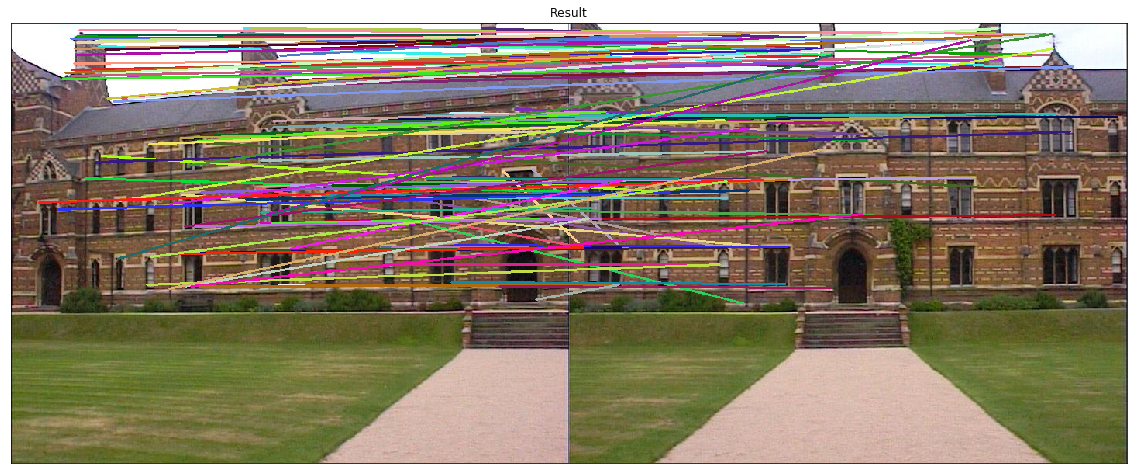

In [14]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'building1.jpg'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


image2 = cv2.imread(os.path.join('images', 'building2.jpg'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image_list.append([find_match(image1,image2), 'Result', 'img'])

plotter(image_list,1 , 1, True, 20, 10, '4')

for create proper files for sending in quera run this cell.

In [15]:
!python notebook_converter.py

End!!!